In [10]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()#.save_account(channel="ibm_quantum", token="...")

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.measure_all()
print(qc.draw())

backend = service.least_busy(operational=True, simulator=False, min_num_qubits=1)
print(backend.name)

from qiskit import transpile
qc_transpiled = transpile(qc, backend, optimization_level=2)

from qiskit.providers.fake_provider import GenericBackendV2
num = 5
coupling_map = [[i,i+1] for i in range(num-1)]+[[i+1,i] for i in range(num-1)]
backend = GenericBackendV2(num_qubits=num, coupling_map=coupling_map)

def is_simulator(backend):
    # For BackendV1:
    if hasattr(backend, 'configuration'):
        return backend.configuration().simulator
    # For BackendV2:
    elif hasattr(backend, 'options'):
        return backend.options['simulator']
    else:
        raise AttributeError("Backend type is not recognized")

if is_simulator(backend):
    print("This is a simulated backend.")
else:
    print("This is a real quantum hardware backend.")


        ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─░─┤M├───
        └───┘ ░ └╥┘┌─┐
   q_1: ──────░──╫─┤M├
              ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
ibm_brisbane


KeyError: 'simulator'

In [24]:
print(backend.name)
print(dir(backend))
print(backend.__class__)
print(GenericBackendV2)

generic_backend_5q
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_add_noisy_instruction_to_target', '_basis_gates', '_build_default_channels', '_build_generic_target', '_calibrate_instructions', '_control_flow', '_coupling_map', '_default_options', '_dtm', '_generate_calibration_defaults', '_get_calibration_sequence', '_get_noise_defaults', '_noise_info', '_num_qubits', '_options', '_provider', '_rng', '_setup_sim', '_sim', '_supported_gates', '_target', 'acquire_channel', 'backend_version', 'channels_map', 'control_channel', 'coupling_map', 'description', 'drive_channel', 'dt', 'dtm', 'instruction_durations', 'instruction_schedule_map', 'inst

In [22]:
qc_job.result()[0].data.meas.get_counts()

{'01': 512, '00': 499, '11': 7, '10': 6}

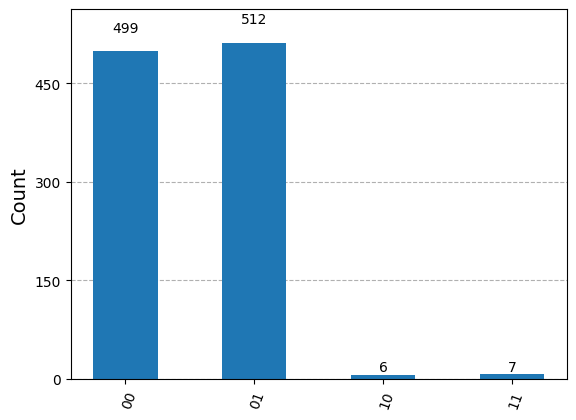

In [ ]:

from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(mode=backend)
#qc_job = sampler.run([qc_transpiled], shots=1024)

from qiskit.visualization import plot_histogram
plot_histogram(qc_job.result()[0].data.meas.get_counts())
